In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score, make_scorer, roc_auc_score
from sklearn.preprocessing import (LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, 
                                   RobustScaler)
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

%matplotlib inline

In [4]:
X_train_master2 = pd.read_pickle('data/X_train_master2.pkl')
X_train_best50_2 = pd.read_pickle('data/X_train_best50_2.pkl')
X_test = pd.read_pickle('data/X_test.pkl')
y_train = pd.read_pickle('data/y_train.pkl')
y_test = pd.read_pickle('data/y_test.pkl')

### Split training dataset into training & validation sets

In [54]:
X_tt, X_val, y_tt, y_val = train_test_split(X_train_best50_2, y_train, random_state=2021)

### `KNeighborClassifer` with `SMOTE`

In [5]:
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    return accuracy_score(y_true, y_pred)

scoring = make_scorer(classification_report_with_accuracy_score)

In [36]:
def classification_report_with_recall_score(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    return recall_score(y_true, y_pred)

recall = make_scorer(classification_report_with_accuracy_score)

In [6]:
pipeline = Pipeline([('scaler', MinMaxScaler()),
                     ('knn', KNeighborsClassifier(n_neighbors=15, weights='distance'))])

scores = cross_val_score(pipeline, X_train_best50_2, y_train, scoring=scoring)
print(scores)

                         precision    recall  f1-score   support

             functional       0.79      0.84      0.82      4830
functional needs repair       0.47      0.34      0.39       646
         non functional       0.79      0.76      0.77      3429

               accuracy                           0.77      8905
              macro avg       0.69      0.65      0.66      8905
           weighted avg       0.77      0.77      0.77      8905

                         precision    recall  f1-score   support

             functional       0.78      0.86      0.82      4830
functional needs repair       0.47      0.32      0.38       646
         non functional       0.79      0.73      0.76      3429

               accuracy                           0.77      8905
              macro avg       0.68      0.64      0.65      8905
           weighted avg       0.76      0.77      0.76      8905

                         precision    recall  f1-score   support

             funct

In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

In [14]:
pipeline = imbPipeline([('scaler', MinMaxScaler()),
                        ('sampling', SMOTE(random_state=2021)),
                        ('knn', KNeighborsClassifier(n_neighbors=15, weights='distance'))])

scores = cross_val_score(pipeline, X_train_best50_2, y_train, scoring=scoring)
print(scores)

                         precision    recall  f1-score   support

             functional       0.81      0.76      0.79      4830
functional needs repair       0.32      0.52      0.40       646
         non functional       0.78      0.75      0.77      3429

               accuracy                           0.74      8905
              macro avg       0.64      0.68      0.65      8905
           weighted avg       0.77      0.74      0.75      8905

                         precision    recall  f1-score   support

             functional       0.81      0.77      0.79      4830
functional needs repair       0.31      0.52      0.39       646
         non functional       0.78      0.73      0.75      3429

               accuracy                           0.74      8905
              macro avg       0.63      0.68      0.65      8905
           weighted avg       0.76      0.74      0.75      8905

                         precision    recall  f1-score   support

             funct

In [16]:
pipeline = imbPipeline([('scaler', MinMaxScaler()),
                        ('sampler', SMOTE(random_state=2021)),
                        ('knn', KNeighborsClassifier(n_neighbors=15, weights='distance'))])

grid = [{
    'knn__n_neighbors': [5, 7, 9, 11, 13, 15],
    'knn__weights': ['uniform', 'distance']
}]

gridsearch_knn3 = GridSearchCV(estimator=pipeline,
                               param_grid=grid,
                               scoring=scoring,
                               cv=5,
                               n_jobs=-1,
                               verbose=True)

gridsearch_knn3.fit(X_train_best50_2, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 18.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('sampler', SMOTE(random_state=2021)),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=15,
                                                             weights='distance'))]),
             n_jobs=-1,
             param_grid=[{'knn__n_neighbors': [5, 7, 9, 11, 13, 15],
                          'knn__weights': ['uniform', 'distance']}],
             scoring=make_scorer(classification_report_with_accuracy_score),
             verbose=True)

In [17]:
gridsearch_knn3.best_params_

{'knn__n_neighbors': 7, 'knn__weights': 'distance'}

In [19]:
gridsearch_knn3.best_score_

0.7420433567259073

### `RandomForestClassifier`

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [21]:
pipeline = Pipeline([('scaler', MinMaxScaler()),
                     ('ranfor', RandomForestClassifier(random_state=2021))])

scores = cross_val_score(pipeline, X_train_best50_2, y_train, scoring=scoring)
print(scores)

                         precision    recall  f1-score   support

             functional       0.81      0.85      0.83      4830
functional needs repair       0.50      0.35      0.41       646
         non functional       0.80      0.78      0.79      3429

               accuracy                           0.79      8905
              macro avg       0.70      0.66      0.68      8905
           weighted avg       0.78      0.79      0.79      8905

                         precision    recall  f1-score   support

             functional       0.79      0.85      0.82      4830
functional needs repair       0.46      0.32      0.38       646
         non functional       0.79      0.75      0.77      3429

               accuracy                           0.78      8905
              macro avg       0.68      0.64      0.66      8905
           weighted avg       0.77      0.78      0.77      8905

                         precision    recall  f1-score   support

             funct

In [22]:
scores.mean()

0.783055964601895

In [23]:
pipeline = Pipeline([('scaler', MinMaxScaler()),
                     ('randfor', RandomForestClassifier(random_state=2021))])

grid = [{
    'randfor__n_estimators': [100, 300, 500],
    'randfor__criterion': ['gini', 'entropy'],
    'randfor__max_features': ['auto', 'sqrt', 'log2']
}]

gridsearch_randfor = GridSearchCV(estimator=pipeline,
                               param_grid=grid,
                               scoring=scoring,
                               cv=5,
                               n_jobs=-1,
                               verbose=True)

gridsearch_randfor.fit(X_train_best50_2, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 12.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('randfor',
                                        RandomForestClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid=[{'randfor__criterion': ['gini', 'entropy'],
                          'randfor__max_features': ['auto', 'sqrt', 'log2'],
                          'randfor__n_estimators': [100, 300, 500]}],
             scoring=make_scorer(classification_report_with_accuracy_score),
             verbose=True)

In [24]:
gridsearch_randfor.best_params_

{'randfor__criterion': 'entropy',
 'randfor__max_features': 'auto',
 'randfor__n_estimators': 100}

In [25]:
gridsearch_randfor.best_score_

0.7832805575272178

### `RandomForestClassifier` with `SMOTE`

In [31]:
pipeline = imbPipeline([('scaler', MinMaxScaler()),
                        ('sampling', SMOTE(random_state=2021)),
                        ('randfor', RandomForestClassifier(random_state=2021, criterion='entropy',
                                                           max_features='auto', n_estimators=100))])

scores = cross_val_score(pipeline, X_train_best50_2, y_train, scoring=scoring)
print(scores)

                         precision    recall  f1-score   support

             functional       0.82      0.80      0.81      4830
functional needs repair       0.39      0.48      0.43       646
         non functional       0.80      0.79      0.79      3429

               accuracy                           0.77      8905
              macro avg       0.67      0.69      0.68      8905
           weighted avg       0.78      0.77      0.78      8905

                         precision    recall  f1-score   support

             functional       0.81      0.80      0.81      4830
functional needs repair       0.37      0.48      0.42       646
         non functional       0.79      0.75      0.77      3429

               accuracy                           0.76      8905
              macro avg       0.66      0.68      0.66      8905
           weighted avg       0.77      0.76      0.76      8905

                         precision    recall  f1-score   support

             funct

In [56]:
# Fit on _tt data and then test on _val:

pipeline = imbPipeline([('scaler', MinMaxScaler()),
                        ('sampling', SMOTE(random_state=2021)),
                        ('randfor', RandomForestClassifier(random_state=2021, criterion='entropy',
                                                           max_features='auto', n_estimators=100))])
pipeline.fit(X_tt, y_tt)
y_tt_pred = pipeline.predict(X_tt)
y_val_pred = pipeline.predict(X_val)

print(f'Training Accuracy Score: {accuracy_score(y_tt, y_tt_pred)}')
print(f'Testing Accuracy Score: {accuracy_score(y_val, y_val_pred)}')

Training Accuracy Score: 0.9936212266411116
Testing Accuracy Score: 0.7698320007187135


In [59]:
print(classification_report(y_val, y_val_pred))

                         precision    recall  f1-score   support

             functional       0.82      0.81      0.81      6038
functional needs repair       0.38      0.48      0.42       819
         non functional       0.80      0.77      0.79      4274

               accuracy                           0.77     11131
              macro avg       0.67      0.69      0.67     11131
           weighted avg       0.78      0.77      0.77     11131



Recall score for `functional needs repair` here is relatively high (although still pretty low), while average accuracy is not too horrible. I'll next experiment with `GridSearch` using a different metrics to see if it'll turn out different than the other gridsearches I've done. Although setting metrics for multi-class is a bit tricky. Still haven't figured out how to do it.

Update: Found out there's something called `_weighted`, `_micro` and `_macro` suffixes that can be attached to `f1`, `recall` and `precision` score. Going to try recall!

### `RandomizedSearchCV`

Going to try randomized search to see if it pick up on anything 

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [64]:
# Create the random grid
random_grid = [{'randfor__n_estimators': n_estimators,
                'randfor__max_features': max_features,
                'randfor__max_depth': max_depth,
                'randfor__min_samples_split': min_samples_split,
                'randfor__min_samples_leaf': min_samples_leaf,
                'randfor__bootstrap': bootstrap}]

In [65]:
pipeline = imbPipeline([('scaler', MinMaxScaler()),
                        ('sampling', SMOTE(random_state=2021)),
                        ('randfor', RandomForestClassifier(random_state=2021))])

randsearch_randfor = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=random_grid,
                                        n_iter=50,
                                        scoring='accuracy',
                                        cv=3,
                                        n_jobs=-1,
                                        verbose=2)

randsearch_randfor.fit(X_tt, y_tt)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 21.3min
Exception in thread Thread-8:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/learn-env/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 567, in run
    self.flag_executor_shutting_down()
  File "/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 756, in flag_executor_shutting_down
    self.kill_workers()
  File "/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 766, in kill_workers
    recursive_terminate(p)
  File "/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/backend/utils.py", line 28, in recursive_terminate
    _recursive_terminate_without_psutil(pr

KeyboardInterrupt: 

In [ ]:
# pipeline = imbPipeline([('scaler', MinMaxScaler()),
#                         ('sampling', SMOTE(random_state=2021)),
#                         ('randfor', RandomForestClassifier(random_state=2021))])

# grid = [{
#     'randfor__n_estimators': [100, 300, 500],
#     'randfor__criterion': ['gini', 'entropy'],
#     'randfor__max_features': ['auto', 'sqrt', 'log2'],
#     'randfor__max_depth' 
# }]

# gridsearch_randfor = GridSearchCV(estimator=pipeline,
#                                param_grid=grid,
#                                scoring='recall_weighted',
#                                cv=5,
#                                n_jobs=-1,
#                                verbose=True)

# gridsearch_randfor.fit(X_train_best50_2, y_train)

### `GradientBoostingClassifier`

In [28]:
pipeline = Pipeline([('scaler', MinMaxScaler()),
                     ('gb_clf', GradientBoostingClassifier(random_state=2021))])

scores = cross_val_score(pipeline, X_train_best50_2, y_train, scoring=scoring)
print(scores)

                         precision    recall  f1-score   support

             functional       0.71      0.93      0.80      4830
functional needs repair       0.73      0.14      0.24       646
         non functional       0.83      0.59      0.69      3429

               accuracy                           0.74      8905
              macro avg       0.76      0.55      0.58      8905
           weighted avg       0.76      0.74      0.72      8905

                         precision    recall  f1-score   support

             functional       0.71      0.92      0.80      4830
functional needs repair       0.65      0.15      0.25       646
         non functional       0.82      0.59      0.69      3429

               accuracy                           0.74      8905
              macro avg       0.73      0.55      0.58      8905
           weighted avg       0.75      0.74      0.72      8905

                         precision    recall  f1-score   support

             funct

In [34]:
scores.mean()

0.7667048353565362

### `GradientBoostingClassifier` with `SMOTE`

In [29]:
pipeline = imbPipeline([('scaler', MinMaxScaler()),
                        ('sampling', SMOTE(random_state=2021)),
                        ('gb_clf', GradientBoostingClassifier(random_state=2021))])

scores = cross_val_score(pipeline, X_train_best50_2, y_train, scoring=scoring)
print(scores)

                         precision    recall  f1-score   support

             functional       0.76      0.72      0.74      4830
functional needs repair       0.24      0.59      0.34       646
         non functional       0.78      0.62      0.69      3429

               accuracy                           0.68      8905
              macro avg       0.59      0.64      0.59      8905
           weighted avg       0.73      0.68      0.69      8905

                         precision    recall  f1-score   support

             functional       0.76      0.72      0.74      4830
functional needs repair       0.23      0.57      0.32       646
         non functional       0.78      0.61      0.68      3429

               accuracy                           0.67      8905
              macro avg       0.59      0.63      0.58      8905
           weighted avg       0.73      0.67      0.69      8905

                         precision    recall  f1-score   support

             funct

<AxesSubplot:>

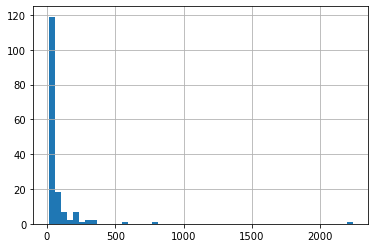

In [52]:
X_test.funder.value_counts()[X_test.funder.value_counts() > 10].hist(bins=50)

In [50]:
X_test.funder.value_counts()[X_test.funder.value_counts() > 10]

Government Of Tanzania     2238
Danida                      807
Hesawa                      575
Rwssp                       340
World Vision                328
                           ... 
Miziriol                     11
Songea District Council      11
Wfp                          11
Ridep                        11
Halmashauri                  11
Name: funder, Length: 161, dtype: int64